In [1]:
# 正态性检验

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import t

In [2]:
%matplotlib inline

### 正态分布

Text(0.5,0,'不同方差, 相同均值')

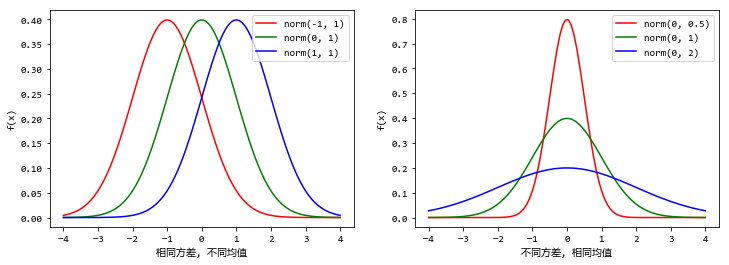

In [3]:
xs_nd = np.linspace(start=-4, stop=4, num=100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(12)

ax1.plot(xs_nd, norm.pdf(xs_nd, loc=-1, scale=1), color='r', label='norm(-1, 1)')
ax1.plot(xs_nd, norm.pdf(xs_nd, loc=0, scale=1), color='g', label='norm(0, 1)')
ax1.plot(xs_nd, norm.pdf(xs_nd, loc=1, scale=1), color='b', label='norm(1, 1)')

ax1.legend()
ax1.set_ylabel('f(x)')
ax1.set_xlabel('相同方差, 不同均值')

ax2.plot(xs_nd, norm.pdf(xs_nd, loc=0, scale=0.5), color='r', label='norm(0, 0.5)')
ax2.plot(xs_nd, norm.pdf(xs_nd, loc=0, scale=1), color='g', label='norm(0, 1)')
ax2.plot(xs_nd, norm.pdf(xs_nd, loc=0, scale=2), color='b', label='norm(0, 2)')

ax2.legend()
ax2.set_ylabel('f(x)')
ax2.set_xlabel('不同方差, 相同均值')

### 对数正态分布

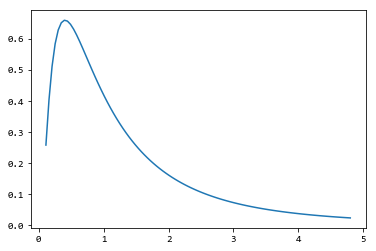

In [4]:
s = 0.954
xs_nd_2 = np.linspace(start=lognorm.ppf(0.01, s), stop=lognorm.ppf(0.95, s), num=100)
plt.figure(figsize=(6, 4))
plt.plot(xs_nd_2, lognorm.pdf(xs_nd_2, s))

### 正态分布和t分布对比

(array(0.), array(1.66666667), array(0.), array(6.))
(array(0.), array(1.66666667), array(0.), array(0.))
[0.37960669] [0.30901936]


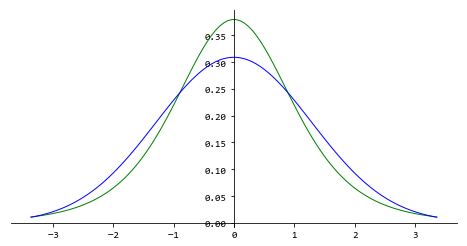

In [5]:
df = 5
sigma = np.sqrt(5/3)
xs_nd_3 = np.linspace(start=t.ppf(0.01, df), stop=t.ppf(0.99, df), num=100)
plt.figure(figsize=(8,4))
plt.plot(xs_nd_3, t.pdf(xs_nd_3, df), color='g', lw=1)
plt.plot(xs_nd_3, norm.pdf(xs_nd_3, 0, sigma), color='b', lw=1)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 方差相同, 峰度不同, t(5)的峰度要高
print(t.stats(df, moments='mvsk'))
print(norm.stats(loc=0, scale=sigma, moments='mvsk'))
print(t.pdf([0], df), norm.pdf([0], 0, sigma))

### 偏度和峰度

In [6]:
mean, variance, skewness, kurtosis = norm.stats(moments="mvsk")
print(mean, variance, skewness, kurtosis)
mean_1, variance, skewness, kurtosis = lognorm.stats(0.95, moments="mvsk")
print(mean, variance, skewness, kurtosis)

0.0 1.0 0.0 0.0
0.0 3.614211636916553 5.406631446568272 79.18946566730335


(0.9978201985359192, 0.7721009254455566)
AndersonResult(statistic=0.23339859489851733, critical_values=array([0.571, 0.651, 0.781, 0.911, 1.083]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.02463268388262485, pvalue=0.9220074815302887)
NormaltestResult(statistic=0.7607542261109828, pvalue=0.6836035647681039)


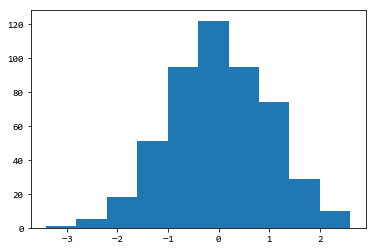

In [7]:
### 正态性检验
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import normaltest

np.random.seed(12345678)
data = norm.rvs(loc=0, scale=1, size=500)
# data = [2.7, -1.2, -1.0, 0, 0.7, 2.0, 3,7, -0.6, 0.8, -0.3]

plt.figure()
plt.hist(data)

# W-test
print(shapiro(data))

# AD检验
print(anderson(data, dist='norm'))

# KS-test or D
print(kstest(data, cdf='norm'))

# Normal-test
print(normaltest(data, axis=0))